In [2]:
from langgraph.graph import StateGraph , START , END
from typing import TypedDict
from langchain_groq import ChatGroq
from dotenv import load_dotenv
from langgraph.checkpoint.memory import InMemorySaver

In [3]:
load_dotenv()

True

In [4]:
llm = ChatGroq(model='llama-3.3-70b-versatile')

In [5]:
class JokeState(TypedDict):
    topic:str
    joke:str
    explanantion:str

In [6]:
def generate_joke(state: JokeState):
    prompt= f'generate a joke on the topic {state["topic"]}'
    response = llm.invoke(prompt).content
    return {'joke' : response }

In [7]:
def generate_explanation(state: JokeState):
    prompt = f'Write an explanantion for the joke - {state["joke"]}'
    response = llm.invoke(prompt).content
    return {'explanantion': response}

In [8]:
graph = StateGraph(JokeState)
graph.add_node('generate_joke',generate_joke)
graph.add_node('generate_explanation',generate_explanation)

graph.add_edge(START,'generate_joke')
graph.add_edge('generate_joke','generate_explanation')
graph.add_edge('generate_explanation',END)

checkpointer = InMemorySaver()
workflow = graph.compile(checkpointer=checkpointer)


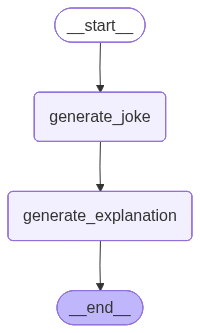

In [9]:
workflow

In [10]:
config1 = {"configurable":{"thread_id":"1"}}
workflow.invoke({'topic':'pizza'}, config=config1)

{'topic': 'pizza',
 'joke': 'Why was the pizza in a bad mood?\n\nBecause it was feeling a little crusty!',
 'explanantion': 'A classic play on words. This joke is funny because it uses a pun to create a humorous connection between the setup and the punchline. \n\nIn this case, the joke asks why the pizza is in a bad mood, and the answer is that it\'s "feeling a little crusty." The word "crusty" has a double meaning here. In one sense, the crust is a part of a pizza, referring to the outer layer of bread that surrounds the toppings. \n\nHowever, "crusty" can also be used to describe someone\'s personality or mood, implying that they are irritable, gruff, or short-tempered. So, when the joke says the pizza is "feeling a little crusty," it\'s making a clever connection between the physical characteristic of the pizza (its crust) and the emotional state of being grumpy or irritable. \n\nThe humor comes from the unexpected twist on the word\'s meaning, creating a lighthearted and silly joke

In [11]:
workflow.get_state(config1)

StateSnapshot(values={'topic': 'pizza', 'joke': 'Why was the pizza in a bad mood?\n\nBecause it was feeling a little crusty!', 'explanantion': 'A classic play on words. This joke is funny because it uses a pun to create a humorous connection between the setup and the punchline. \n\nIn this case, the joke asks why the pizza is in a bad mood, and the answer is that it\'s "feeling a little crusty." The word "crusty" has a double meaning here. In one sense, the crust is a part of a pizza, referring to the outer layer of bread that surrounds the toppings. \n\nHowever, "crusty" can also be used to describe someone\'s personality or mood, implying that they are irritable, gruff, or short-tempered. So, when the joke says the pizza is "feeling a little crusty," it\'s making a clever connection between the physical characteristic of the pizza (its crust) and the emotional state of being grumpy or irritable. \n\nThe humor comes from the unexpected twist on the word\'s meaning, creating a lighthea

In [12]:
list(workflow.get_state_history(config1))

[StateSnapshot(values={'topic': 'pizza', 'joke': 'Why was the pizza in a bad mood?\n\nBecause it was feeling a little crusty!', 'explanantion': 'A classic play on words. This joke is funny because it uses a pun to create a humorous connection between the setup and the punchline. \n\nIn this case, the joke asks why the pizza is in a bad mood, and the answer is that it\'s "feeling a little crusty." The word "crusty" has a double meaning here. In one sense, the crust is a part of a pizza, referring to the outer layer of bread that surrounds the toppings. \n\nHowever, "crusty" can also be used to describe someone\'s personality or mood, implying that they are irritable, gruff, or short-tempered. So, when the joke says the pizza is "feeling a little crusty," it\'s making a clever connection between the physical characteristic of the pizza (its crust) and the emotional state of being grumpy or irritable. \n\nThe humor comes from the unexpected twist on the word\'s meaning, creating a lighthe

In [14]:
config2 = {"configurable":{"thread_id":"2"}}
workflow.invoke({'topic':'pasta'}, config=config2)

{'topic': 'pasta',
 'joke': 'Why did the spaghetti refuse to get married?\n\nBecause it was afraid of getting tangled up in a relationship!',
 'explanantion': 'A clever play on words. This joke is funny because it uses a common phrase associated with relationships, "getting tangled up," and gives it a literal twist. In this case, the spaghetti is afraid of getting married because it\'s afraid of getting "tangled up" - not just emotionally, but also physically, like the strands of pasta can become knotted and entwined.\n\nThe humor comes from the unexpected connection between the idea of a romantic relationship and the physical properties of spaghetti. It\'s a lighthearted and clever pun that creates a humorous effect by playing with the multiple meanings of the phrase "tangled up." The joke requires a quick mental shift to understand the wordplay, and the surprise and delight of making that connection creates the comedic effect.'}

In [15]:
workflow.get_state(config2)

StateSnapshot(values={'topic': 'pasta', 'joke': 'Why did the spaghetti refuse to get married?\n\nBecause it was afraid of getting tangled up in a relationship!', 'explanantion': 'A clever play on words. This joke is funny because it uses a common phrase associated with relationships, "getting tangled up," and gives it a literal twist. In this case, the spaghetti is afraid of getting married because it\'s afraid of getting "tangled up" - not just emotionally, but also physically, like the strands of pasta can become knotted and entwined.\n\nThe humor comes from the unexpected connection between the idea of a romantic relationship and the physical properties of spaghetti. It\'s a lighthearted and clever pun that creates a humorous effect by playing with the multiple meanings of the phrase "tangled up." The joke requires a quick mental shift to understand the wordplay, and the surprise and delight of making that connection creates the comedic effect.'}, next=(), config={'configurable': {'

In [16]:
list(workflow.get_state_history(config2))

[StateSnapshot(values={'topic': 'pasta', 'joke': 'Why did the spaghetti refuse to get married?\n\nBecause it was afraid of getting tangled up in a relationship!', 'explanantion': 'A clever play on words. This joke is funny because it uses a common phrase associated with relationships, "getting tangled up," and gives it a literal twist. In this case, the spaghetti is afraid of getting married because it\'s afraid of getting "tangled up" - not just emotionally, but also physically, like the strands of pasta can become knotted and entwined.\n\nThe humor comes from the unexpected connection between the idea of a romantic relationship and the physical properties of spaghetti. It\'s a lighthearted and clever pun that creates a humorous effect by playing with the multiple meanings of the phrase "tangled up." The joke requires a quick mental shift to understand the wordplay, and the surprise and delight of making that connection creates the comedic effect.'}, next=(), config={'configurable': {